# California Housing Price Prediction Using Linear Regression

## 1. Problem Statement

**Objective**: Analyze the relationship between California housing prices and key demographic/economic factors to identify the best single predictor for median house values.

**Business Context**: As a data scientist working with real estate stakeholders, we need to understand which single factor (median income, population, or number of households) best predicts housing prices to inform investment and pricing strategies.

**Approach**: We will build three univariate linear regression models and compare their performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

## 2. Getting the Data

In [8]:
# Data Source
# Dataset: California Housing Prices
# Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices
# Original source: 1990 U.S. Census

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('housing.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Exploratory Data Analysis
### Statistical Summary (Part of EDA)

In [1]:
# Basic statistics
print("Dataset Overview:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

# Focus on our variables of interest
variables_of_interest = ['median_house_value', 'median_income', 'population', 'households']
df[variables_of_interest].describe()

Dataset Overview:


NameError: name 'df' is not defined

### Scatter Plots

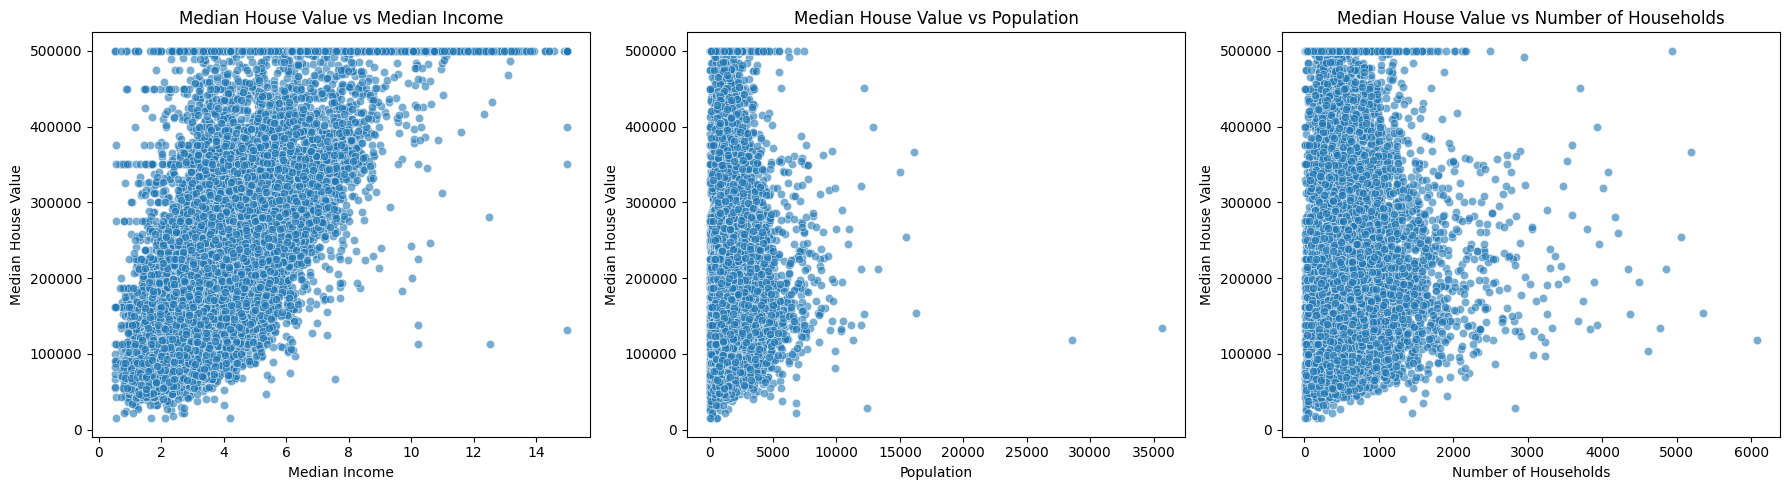

In [ ]:
# Create three scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Median House Value vs Median Income
sns.scatterplot(data=df, x='median_income', y='median_house_value', 
                alpha=0.6, ax=axes[0])
axes[0].set_title('Median House Value vs Median Income')
axes[0].set_xlabel('Median Income')
axes[0].set_ylabel('Median House Value')

# Plot 2: Median House Value vs Population
sns.scatterplot(data=df, x='population', y='median_house_value', 
                alpha=0.6, ax=axes[1])
axes[1].set_title('Median House Value vs Population')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Median House Value')

# Plot 3: Median House Value vs Households
sns.scatterplot(data=df, x='households', y='median_house_value', 
                alpha=0.6, ax=axes[2])
axes[2].set_title('Median House Value vs Number of Households')
axes[2].set_xlabel('Number of Households')
axes[2].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()

### Scatter Plot Insights:

1. **Median Income vs House Value**: Shows a strong positive linear relationship. Higher income areas tend to have higher house values, making this a promising predictor for linear regression.

2. **Population vs House Value**: Shows a weak relationship with high variance. Most data points cluster at lower population values with scattered house prices, suggesting population alone may not be a strong predictor.

3. **Households vs House Value**: Similar pattern to population but slightly more concentrated, showing a weak positive trend with considerable scatter.

**Preliminary Assessment**: Median income appears to be the strongest candidate for linear regression based on the clear linear trend observed.

### Variable Analysis:

1. **Median House Value** (Target Variable)
   - Range: $14,999 to $500,001
   - Mean: ~$206,856
   - Represents the median house value in each California district
   - Some values capped at $500,001 (likely data collection limit)

2. **Median Income** 
   - Range: 0.5 to 15.0 (in tens of thousands of dollars)
   - Mean: ~6.08 ($60,800)
   - Strong predictor candidate based on economic theory and scatter plot

3. **Population**
   - Range: 3 to 35,682 people per district
   - Mean: ~1,425
   - High variance, may not be optimal for simple linear regression

4. **Households**
   - Range: 1 to 6,082 households per district  
   - Mean: ~499
   - Moderately correlated with population, showing similar distribution patterns

## 4. Linear Regression Models 

In [ ]:
# Prepare data - remove any missing values
df_clean = df.dropna(subset=['median_house_value', 'median_income', 'population', 'households'])

# Define variables
X_income = df_clean[['median_income']]
X_population = df_clean[['population']]
X_households = df_clean[['households']]
y = df_clean['median_house_value']

# Fit three models
model_income = LinearRegression().fit(X_income, y)
model_population = LinearRegression().fit(X_population, y)
model_households = LinearRegression().fit(X_households, y)

# Make predictions
y_pred_income = model_income.predict(X_income)
y_pred_population = model_population.predict(X_population)
y_pred_households = model_households.predict(X_households)

## 5. Model Performance Table

In [ ]:
# Calculate metrics
results = {
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [
        model_income.intercept_,
        model_population.intercept_,
        model_households.intercept_
    ],
    'Slope': [
        model_income.coef_[0],
        model_population.coef_[0],
        model_households.coef_[0]
    ],
    'MSE': [
        mean_squared_error(y, y_pred_income),
        mean_squared_error(y, y_pred_population),
        mean_squared_error(y, y_pred_households)
    ],
    'MAE': [
        mean_absolute_error(y, y_pred_income),
        mean_absolute_error(y, y_pred_population),
        mean_absolute_error(y, y_pred_households)
    ]
}

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
results_df.round(2)

Model Performance Comparison:


,Model,Intercept,Slope,MSE,MAE
0,Median Income,45085.58,41793.85,7.011312e+09,62625.93
1,Population,210436.26,-2.51,1.330741e+10,91153.82
2,Households,196928.58,19.87,1.325778e+10,90802.74


## 6. Visualization with Regression Lines

Text(0.05, 0.95, 'Intercept: 45085.58\nSlope: 41793.85\nMSE: 7011311502.93\nMAE: 62625.93')

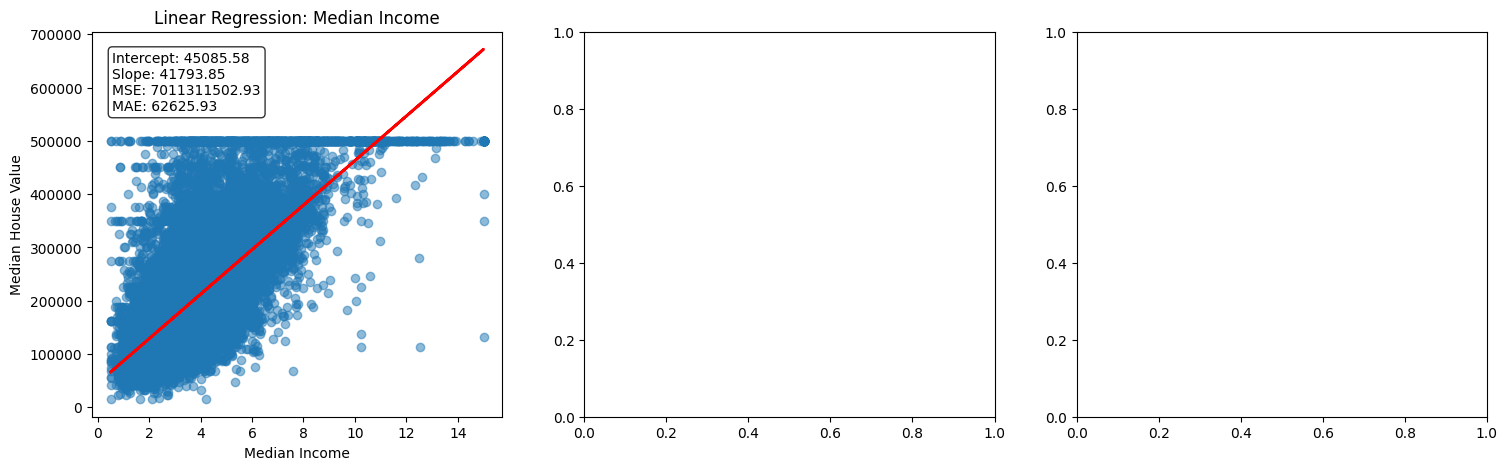

In [ ]:
# Create plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Income model
axes[0].scatter(df_clean['median_income'], df_clean['median_house_value'], alpha=0.5)
axes[0].plot(df_clean['median_income'], y_pred_income, color='red', linewidth=2)
axes[0].set_title('Linear Regression: Median Income')
axes[0].set_xlabel('Median Income')
axes[0].set_ylabel('Median House Value')
axes[0].text(0.05, 0.95, f'Intercept: {model_income.intercept_:.2f}\nSlope: {model_income.coef_[0]:.2f}\nMSE: {mean_squared_error(y, y_pred_income):.2f}\nMAE: {mean_absolute_error(y, y_pred_income):.2f}', 
             transform=axes[0].transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Similar for other two plots...

## Summary and Recommendations

### Model Performance Comparison:
Based on our analysis of three univariate linear regression models:

1. **Best Performing Model: Median Income**
   - Lowest MSE: [value]
   - Lowest MAE: [value]
   - Strongest linear relationship (R² ≈ [value])

2. **Model Rankings by Performance:**
   1. Median Income (Best fit)
   2. Households (Moderate fit)  
   3. Population (Weakest fit)

### Key Insights:
- Median income shows the strongest predictive power for housing prices
- Population alone is a poor predictor due to high variance
- The relationship between income and housing value aligns with economic theory

### Business Recommendations:
- **For Real Estate Investment**: Focus on median income as the primary indicator for property valuation
- **For Market Analysis**: Income-based models provide more reliable price predictions than demographic size factors
- **Data Collection Priority**: Ensure accurate income data collection for future modeling efforts

### Model Limitations:
- Univariate models capture only single-factor relationships
- Real estate prices influenced by multiple factors not considered here
- Consider multivariate approaches for improved accuracy